# Catur Jawa Scratch Notes

Import the all_state.json file and all_possible_moves.json file

## Helper Function and Visualizer

In [ ]:
# Helper Next Moves

def rule1():
    """Catur Jawa Original Rule, No Diagonal.

    Parameters
    ----------
    N/A

    Returns
    -------
    Dict :
        A Dictionary which contains movesets for a certain position for
        no diagonal rule.

    Notes
    -------
    Here is some visualization for the position:

    0 1 2  O O O
    3 4 5  - - -
    6 7 8  X X X
    """

    NO_DIAGONAL_DICT_RULE = {
            0 : [1,3],
            1 : [0, 2, 4],
            2 : [1, 5],
            3 : [0, 4, 6],
            4 : [1, 3, 5, 7],
            5 : [2, 4, 8],
            6 : [3, 7],
            7 : [4, 6, 8],
            8 : [5, 7]}
    return NO_DIAGONAL_DICT_RULE

def swap(state_string, num1, num2):
    """Swap 2 character based on their index

    Parameters
    ----------
    state_string : str
    The string which its char going to be swapped.

    num1 : int
        index of first character to be swapped

    num2 : int
        index of second character to be swapped

    Returns
    -------
    String :
        A new string which its two character has been swapped
    """

    temp1 = state_string[num1]
    temp2 = state_string[num2]
    state_string = state_string[:num1] + temp2 + state_string[num1 + 1:]
    state_string = state_string[:num2] + temp1 + state_string[num2 + 1:]
    return state_string

def all_next_moves(state_string, dict_rule):
    """find all possible moves from a board state

    Parameters
    ----------
    state_string : str
    The board state which are going to be checked its moveset

    dict_rule : dict
        A dictionary which contains rule for particular catur jawa game

    Returns
    -------
    List (String) :
        A list which contains all possible moves from input state
    """

    old_state = state_string[1:]
    whose_turn = state_string[0]
    list_new_moves = []

    next_turn = "X"
    if whose_turn == "X":
        next_turn = "O"

    for i in range(len(old_state)):
        if old_state[i] == "-":
            for j in dict_rule[i]:
                if old_state[j] == whose_turn:
                    new_move = next_turn + swap(old_state, i, j)
                    list_new_moves.append(new_move)

    return list_new_moves

In [ ]:
# Helper State Generation

import json

def base10_to_base3(num):
    """Convert base 10 integer to base 3.

    Parameters
    ----------
    num : int
        An integer in base 10

    Returns
    -------
    String :
        A string which is base 3 integer form from input
    """

    if num < 0:
        return "-" + str(base10_to_base3(num*-1))
    if num == 0:
        return "0"*9
    numbers = []
    while num:
        num, r = divmod(num, 3)
        numbers.append(str(r))
    hasil = ''.join(reversed(numbers))
    zeroes = "0"*(9-len(hasil))
    return zeroes + hasil

def num_to_letter_converter(state_num):
    """Convert state form from number(0, 1, 2) to letter (O, -, X)

    Parameters
    ----------
    state_num : str
        A string that represent state in the form of number

    Returns
    -------
    String :
        A string that represent state in the form of letter
    """

    temp = state_num.replace("0", "O")
    temp1 = temp.replace("1", "-")
    return temp1.replace("2", "X")


def generating_state_unconstrained():
    """Create all state in catur jawa board using base 3, and return
    it as a list of string. There are 19683 state possible in catur
    jawa board.

    Parameters
    ----------
    N/A

    Returns
    -------
    List :
        a list of strings that contains all possible state of the board
    """

    state_list = []
    for i in range(3**9):
        state_num = base10_to_base3(i)
        state_letter = num_to_letter_converter(state_num)
        state_list.append(state_letter)

    return state_list

def generating_state():
    """Create all state constrained by 3 stone per type, (3 X stone,
    3 O stone and 3 spaces) in catur jawa board, and return it as a
    list of string. There are 19683 state possible in catur
    jawa board.

    Parameters
    ----------
    N/A

    Returns
    -------
    List :
        a list of strings that contains all possible state of the board
    """

    state_list = []
    for i in range(3**9):
        state_num = base10_to_base3(i)
        state_letter = num_to_letter_converter(state_num)

        isConstrainedX = state_letter.count("X") == 3
        isConstrainedO = state_letter.count("O") == 3
        isConstrainedStrip = state_letter.count("-") == 3

        if (isConstrainedX and isConstrainedO and isConstrainedStrip):
            state_list.append(state_letter)

    state_list_O = []
    for i in state_list:
        new_state_letter = "O" + i
        state_list_O.append(new_state_letter)

    state_list_X = []
    for i in state_list:
        new_state_letter = "X" + i
        state_list_X.append(new_state_letter)

    state_list = state_list_O + state_list_X
    return state_list

def save_all_state_to_json(list_all_state_input, filename):
    """Creating a JSON file which contains key and value of all state
    that could happen in catur jawa board.

    Parameters
    ----------
    list_all_state_input : List(str)
    filename : str

    Returns
    -------
    N/A

    Notes
    -----
        This function will create JSON named "[filename].json" that will
        be saved on a folder named "data".
    """
    num_state_dict = {}
    state_num_dict = {}
    state_dict = {}
    list_all_state = list_all_state_input
    list_key = list(range(len(list_all_state)))

    for i in list_key:
        num_state_dict[str(i)] = list_all_state[i]
        state_num_dict[list_all_state[i]] = str(i)

    state_dict = {"num_state_dict": num_state_dict, "state_num_dict": state_num_dict}
    file_name = filename if (".json" in filename) else (filename + ".json")

    json_string = json.dumps(state_dict)
    jsonFile = open(file_name, "w")
    jsonFile.write(json_string)
    jsonFile.close()

def save_all_state_next_moves_to_json(filename):
    """Creating a JSON file which contains all state and its movesets

    Parameters
    ----------
    filename : str

    Returns
    -------
    N/A

    Notes
    -----
        This function will create JSON named "[filename].json" that will
        be saved on a folder named "data".
    """

    f = open('all_state.json',)
    data = json.load(f)
    f.close()

    all_state_moves_dict = {}
    list_all_state = list(data["num_state_dict"].values())

    for i in list_all_state:
        list_possible_moves = all_next_moves(i, rule1())
        all_state_moves_dict[i] = list_possible_moves

    file_name = filename if (".json" in filename) else (filename + ".json")

    json_string = json.dumps(all_state_moves_dict)
    jsonFile = open(file_name, "w")
    jsonFile.write(json_string)
    jsonFile.close()

In [ ]:
# Visualizer CLI

def print_snapshot(state_string):
    """Prints the state of boards visually

    Parameters
    ----------
    string_state : str
        Strings that describe the state of board

    Returns
    -------
    N/A
    """
    string_state = state_string[1:]
    whose_turn = state_string[0]

    if len(string_state) != 9:
        print("failed to process " + string_state)
        print("Input state too short or too long.")
        return

    UPROW = string_state[0:3]
    MIDROW = string_state[3:6]
    DOWNROW = string_state[6:9]
    SPACE = " | "

    print("String State: " + string_state)
    print("Turn: " + whose_turn)
    print(UPROW[0] + SPACE + UPROW[1] + SPACE + UPROW[2])
    print(MIDROW[0] + SPACE + MIDROW[1] + SPACE + MIDROW[2])
    print(DOWNROW[0] + SPACE + DOWNROW[1] + SPACE + DOWNROW[2])
    print()


## Main

In [ ]:
f = open('all_possible_moves.json',)
data_all_possible_moves = json.load(f)
f.close()

f = open('all_state.json',)
data_all_state = json.load(f)
f.close()

for i in data_all_possible_moves["XOOO---XXX"]:
    print_snapshot(i)

print(f'number: {data_all_state["num_state_dict"]["1680"]}')

print(f'state: {data_all_state["state_num_dict"]["XOOO---XXX"]}')

String State: OOOX---XX
Turn: O
O | O | O
X | - | -
- | X | X

String State: OOO-X-X-X
Turn: O
O | O | O
- | X | -
X | - | X

String State: OOO--XXX-
Turn: O
O | O | O
- | - | X
X | X | -

number: XOOO---XXX
state: 1680


In [ ]:
## IMPORTANT

"""
    0 1 2  O O O
    3 4 5  - - -
    6 7 8  X X X
"""

def game_row(string_state, row_line, check_player):
  """Checking a row of a line

    Parameters
    ----------
    string_state:
        The string state of the board (without turns)

    row_line:
        Which row that need to be checked if its created a line

    check_player:
        Whose player that needed to be check if its created a line

    Returns
    -------
    Boolean :
        True or false if player creates a line outside home line

    Notes
    -------
    Here is some visualization for the row and column:

                           col1 col2 col3
    0 1 2  O O O     row1    0    1    2
    3 4 5  - - -     row2    3    4    5
    6 7 8  X X X     row3    6    7    8
  """
  row = row_line*3
  return (string_state[row] == check_player) and (string_state[row+1] == check_player) and (string_state[row+2] == check_player)

def game_column(string_state, column_line, check_player):
  """Checking a column of a line

    Parameters
    ----------
    string_state:
        The string state of the board (without turns)

    column_line:
        Which column that need to be checked if its created a line

    check_player:
        Whose player that needed to be check if its created a line

    Returns
    -------
    Boolean :
        True or false if player creates a line outside home line

    Notes
    -------
    Here is some visualization for the row and column:

                           col1 col2 col3
    0 1 2  O O O     row1    0    1    2
    3 4 5  - - -     row2    3    4    5
    6 7 8  X X X     row3    6    7    8
  """
  column = column_line
  return (string_state[column] == check_player) and (string_state[column+3] == check_player) and (string_state[column+6] == check_player)

def game_diagonal(string_state, diagonal_line, check_player):
  """Checking a diagonal of a line

    Parameters
    ----------
    string_state:
        The string state of the board (without turns)

    diagonal_line:
        Which diagonal that need to be checked if its created a line

    check_player:
        Whose player that needed to be check if its created a line

    Returns
    -------
    Boolean :
        True or false if player creates a line outside home line

    Notes
    -------
    Here is some visualization for the diagonal and column:

                     diag0 col1 col2 col3 diag1
    0 1 2  O O O     row1    0    1    2
    3 4 5  - - -     row2    3    4    5
    6 7 8  X X X     row3    6    7    8
  """
  diagonal_num = [0,4,8] if diagonal_line == 0 else [2,4,6]
  return (string_state[diagonal_num[0]] == check_player) and (string_state[diagonal_num[1]] == check_player) and (string_state[diagonal_num[2]] == check_player)


def generating_win_condition(data_all_state):
  """Generate WIN CONDITION for catur jawa game

    Parameters
    ----------
    data_all_state:
        A dictionary parsed from all_state.json

    Returns
    -------
    List of Win State :
        A list of all win state possible from checking win condition

    Notes
    -------
    Here is some visualization for the row and column:

                           col1 col2 col3
    0 1 2  O O O     row1    0    1    2
    3 4 5  - - -     row2    3    4    5
    6 7 8  X X X     row3    6    7    8
  """
  list_state = list(data_all_state["state_num_dict"].keys())
  list_win_state = []


  for i in list_state:
    turn = i[0]
    string_state = i[1:]

    # X wins
    if turn == "O": # When X wins, the O turn state has X lined up
      if game_row(string_state, 0, "X") or game_row(string_state, 1, "X"):
        list_win_state.append(i)
      elif game_column(string_state, 0, "X") or game_column(string_state, 1, "X") or game_column(string_state, 2, "X"):
        list_win_state.append(i)
      #elif game_diagonal(string_state, 0, "X") or game_row(string_state, 1, "X"):
        #list_win_state.append(i)
      else:
        continue

    # O wins
    if turn == "X": # When O wins, the X turn state has O lined up
      if game_row(string_state, 1, "O") or game_row(string_state, 2, "O"):
        list_win_state.append(i)
      elif game_column(string_state, 0, "O") or game_column(string_state, 1, "O") or game_column(string_state, 2, "O"):
        list_win_state.append(i)
      #elif game_diagonal(string_state, 0, "O") or game_diagonal(string_state, 1, "O"):
        #list_win_state.append(i)
      else:
        continue

  return list_win_state

test124 = generating_win_condition(data_all_state)

for i in test124:
  print_snapshot(i)

print(len(test124))


String State: OOOXXX---
Turn: O
O | O | O
X | X | X
- | - | -

String State: OO-XXXO--
Turn: O
O | O | -
X | X | X
O | - | -

String State: OO-XXX-O-
Turn: O
O | O | -
X | X | X
- | O | -

String State: OO-XXX--O
Turn: O
O | O | -
X | X | X
- | - | O

String State: OOXO-X--X
Turn: O
O | O | X
O | - | X
- | - | X

String State: OOX-OX--X
Turn: O
O | O | X
- | O | X
- | - | X

String State: OOX--XO-X
Turn: O
O | O | X
- | - | X
O | - | X

String State: OOX--X-OX
Turn: O
O | O | X
- | - | X
- | O | X

String State: O-OXXXO--
Turn: O
O | - | O
X | X | X
O | - | -

String State: O-OXXX-O-
Turn: O
O | - | O
X | X | X
- | O | -

String State: O-OXXX--O
Turn: O
O | - | O
X | X | X
- | - | O

String State: O--XXXOO-
Turn: O
O | - | -
X | X | X
O | O | -

String State: O--XXXO-O
Turn: O
O | - | -
X | X | X
O | - | O

String State: O--XXX-OO
Turn: O
O | - | -
X | X | X
- | O | O

String State: O-XOOX--X
Turn: O
O | - | X
O | O | X
- | - | X

String State: O-XO-XO-X
Turn: O
O | - | X
O | - | X
O |

In [ ]:
se = "OOXOXO--X-"
WIN_CONDITION = generating_win_condition(data_all_state)

print(se in WIN_CONDITION)

test32 = ['XOOO---XXX','X--OOXXO-X', 'O--OO-XOXX', 'X--O-OXOXX']

for i in WIN_CONDITION:
  print_snapshot(i)

print(WIN_CONDITION)

for i in test32:
  print_snapshot(i)


False
String State: OOOXXX---
Turn: O
O | O | O
X | X | X
- | - | -

String State: OO-XXXO--
Turn: O
O | O | -
X | X | X
O | - | -

String State: OO-XXX-O-
Turn: O
O | O | -
X | X | X
- | O | -

String State: OO-XXX--O
Turn: O
O | O | -
X | X | X
- | - | O

String State: OOXO-X--X
Turn: O
O | O | X
O | - | X
- | - | X

String State: OOX-OX--X
Turn: O
O | O | X
- | O | X
- | - | X

String State: OOX--XO-X
Turn: O
O | O | X
- | - | X
O | - | X

String State: OOX--X-OX
Turn: O
O | O | X
- | - | X
- | O | X

String State: O-OXXXO--
Turn: O
O | - | O
X | X | X
O | - | -

String State: O-OXXX-O-
Turn: O
O | - | O
X | X | X
- | O | -

String State: O-OXXX--O
Turn: O
O | - | O
X | X | X
- | - | O

String State: O--XXXOO-
Turn: O
O | - | -
X | X | X
O | O | -

String State: O--XXXO-O
Turn: O
O | - | -
X | X | X
O | - | O

String State: O--XXX-OO
Turn: O
O | - | -
X | X | X
- | O | O

String State: O-XOOX--X
Turn: O
O | - | X
O | O | X
- | - | X

String State: O-XO-XO-X
Turn: O
O | - | X
O | - |

In [ ]:
WIN_CONDITION = generating_win_condition(data_all_state)


class NodeGame:
  def __init__(self, id, string_state, list_ancestor_id, treeid = None):
    self.id = id
    self.string_state = string_state
    self.list_ancestor_id = list_ancestor_id
    self.all_possible_move = data_all_possible_moves[string_state]
    self.score = None
    self.treeid = treeid

  def __str__(self):
    return f"<NodeGame> \nID: {self.id} \nState: {self.string_state} \nAncestor ID List: {self.list_ancestor_id} \nAll Possible Moves: {self.all_possible_move} \ntree ID: {self.treeid}\n</NodeGame>"

  def __repr__(self):
    return f"{self.string_state}"

  def is_terminal(self):
    return True if (self.string_state in WIN_CONDITION) or (len(self.all_possible_move) == 0) else False

  def evaluate(self):
    if self.string_state not in WIN_CONDITION:
      return 0
    turn = self.string_state[0]
    win = "X" if turn == "O" else "O"
    return 1 if win == "X" else -1

  def generate_children(self):
    list_ancestor = self.list_ancestor_id.copy()
    list_ancestor.append(self.id)
    list_stringState_ancestor = list(map(map_nodeId_stringState, list_ancestor))

    list_children_node = []

    for i in self.all_possible_move:
      if (i in list_stringState_ancestor): continue

      str_counter = str(len(node_dict))
      child_node = NodeGame(str_counter, i, list_ancestor)

      node_dict[str_counter] = child_node
      list_children_node.append(child_node)
    return list_children_node


def map_nodeId_nodeState(node_id):
  return node_dict[node_id]

def map_node_stringState(node):
  return node.string_state

def map_nodeId_stringState(node_id):
  return map_node_stringState(map_nodeId_nodeState(node_id))

def child_num(node):
  parent = node_dict[node.list_ancestor_id[-1]]
  return parent.all_possible_move.index(node.string_state)

def treeid_maker(node):
  parent = node_dict[node.list_ancestor_id[-1]]
  return parent.treeid + str(child_num(node))

def minimax_alpha_beta(node, depth, alpha, beta, maximizing_player):
    if depth == 0 or node.is_terminal():
        if node.evaluate() != 0:
          print(f'node_terminal')
          print(node)
          print_snapshot(node.string_state)
        return node.evaluate()

    if maximizing_player:
        max_eval = float('-inf')
        for child in node.generate_children():
            ev = minimax_alpha_beta(child, depth - 1, alpha, beta, False)
            max_eval = max(max_eval, ev)
            alpha = max(alpha, ev)
            if beta <= alpha:
                break  # Beta cutoff
        return max_eval
    else:
        min_eval = float('inf')
        for child in node.generate_children():
            ev = minimax_alpha_beta(child, depth - 1, alpha, beta, True)
            min_eval = min(min_eval, ev)
            beta = min(beta, ev)
            if beta <= alpha:
                break  # Alpha cutoff
        return min_eval


In [ ]:
start = NodeGame("0", "XOOO---XXX", [], "0")
node_dict = {"0" : start}

minimax_alpha_beta(start, 9, float('-inf'), float('inf'), True)

node_terminal
<NodeGame> 
ID: 32 
State: O-OOXXXO-- 
Ancestor ID List: ['0', '1', '4', '6', '9', '12', '17', '19', '31'] 
All Possible Moves: ['XO-OXXXO--', 'X-OOXXX-O-'] 
tree ID: None
</NodeGame>
String State: -OOXXXO--
Turn: O
- | O | O
X | X | X
O | - | -

node_terminal
<NodeGame> 
ID: 137 
State: OOO-XXX--O 
Ancestor ID List: ['0', '1', '4', '6', '10', '117', '122', '124', '136'] 
All Possible Moves: ['XO-OXXX--O', 'XOO-XXX-O-'] 
tree ID: None
</NodeGame>
String State: OO-XXX--O
Turn: O
O | O | -
X | X | X
- | - | O

node_terminal
<NodeGame> 
ID: 143 
State: OOOOXXX--- 
Ancestor ID List: ['0', '1', '4', '6', '11'] 
All Possible Moves: [] 
tree ID: None
</NodeGame>
String State: OOOXXX---
Turn: O
O | O | O
X | X | X
- | - | -

node_terminal
<NodeGame> 
ID: 352 
State: OOXO-XO-X- 
Ancestor ID List: ['0', '1', '5', '315', '319', '322', '325', '329', '349'] 
All Possible Moves: ['X-XOOXO-X-', 'XOXO-X--XO'] 
tree ID: None
</NodeGame>
String State: OXO-XO-X-
Turn: O
O | X | O
- | X | O


1

In [ ]:
node_dict

{'0': XOOO---XXX,
 '1': OOOOX---XX,
 '2': OOOO-X-X-X,
 '3': OOOO--XXX-,
 '4': XO-OXO--XX,
 '5': XOO-X-O-XX,
 '6': OO-OXOX-X-,
 '7': OO-O-O-XXX,
 '8': OO-OXO-X-X,
 '9': X-OOXOX-X-,
 '10': XOO-XOX-X-,
 '11': XOOOX-X-X-,
 '12': OXOO-OX-X-,
 '13': O-OO-OXXX-,
 '14': O-OOXOXX--,
 '15': O-OOXO--XX,
 '16': O-OOXOX--X,
 '17': XXOOO-X-X-,
 '18': OXOOOX--X-,
 '19': OXOOOXX---,
 '20': OXOOO-XX--,
 '21': OXOOO---XX,
 '22': OXOOO-X--X,
 '23': XXO-OXO-X-,
 '24': XXOO-X-OX-,
 '25': OXO-OXOX--,
 '26': OXO-OXO--X,
 '27': O-OOXX-OX-,
 '28': OXOOX--OX-,
 '29': OXOO--XOX-,
 '30': OXOO-X-O-X,
 '31': XXOO-XXO--,
 '32': O-OOXXXO--,
 '33': OXOOX-XO--,
 '34': OXOO--XOX-,
 '35': OXOO-X-O-X,
 '36': XX-OOOXX--,
 '37': XXOO-OXX--,
 '38': O-XOOOXX--,
 '39': OX-OOOX-X-,
 '40': OX-OOO-X-X,
 '41': XX-OOO--XX,
 '42': XXOO-O--XX,
 '43': XXO-O-O-XX,
 '44': XXOO---OXX,
 '45': O-XOOO--XX,
 '46': OX-OOOX-X-,
 '47': OX-OOO-X-X,
 '48': XX-OOOX--X,
 '49': XXOO-OX--X,
 '50': XXOO--XO-X,
 '51': O-XOOOX--X,
 '52': OX-OOOX-X-,
 '5

# Estimating Game Tree Size

## DFS and BFS

Upon investigation, it has become evident that it is not feasible to fully construct the game state tree within a reasonable timeframe due to its immensely large size. By analyzing the first one million nodes obtained through Depth First Search (DFS), it is estimated that the game state tree for "Catur Jawa" has approximately ${2.541}^{861.547}$ nodes (calculated as the average branching factor or average number of possible choices raised to the average depth), or roughly ${10}^{348}$ nodes. DFS was chosen over Breadth First Search (BFS) for calculating the average as DFS can reach the maximum depth and avoids underestimating the average depth.

Additional statistical information is as follows:

1. Upper bound estimation for the game tree size:

  - The maximum number of possible moves (global maximum) raised to the maximum depth (local maximum) yields an upper bound estimate of ${7}^{891} \approx {10}^{753}$ nodes.

  - A more reasonable upper bound is to consider average branching factor with maximum depth. That is approximately ${2.541}^{891}$ nodes or ${10}^{361}$

2. Using BFS, we observed the following:

  - The first one million shallow nodes have a maximum depth of 13.


 There are potential disadvantages of using Depth First Search (DFS) for calculating the average depth of a game tree. DFS explores the tree by traversing as far as possible along each branch before backtracking. In some cases, this can lead to biased depth measurements, especially if the tree structure is irregular or unbalanced. DFS tends to explore deeper branches first, which can skew the average depth calculation towards deeper levels and underestimate the true average depth.

In [ ]:
#Tree Generation
counter = 0
start = NodeGame("0", "XOOO---XXX", [], "0")
node_dict = {"0" : start}
node_queue = [start]

WIN_CONDITION = generating_win_condition(data_all_state)

c = 0
average_depth = 0
average_possible_moves = 0
max_depth = 0
max_possible_moves = 0
list_average_len_possible_moves = []
list_average_depth = []
list_max_depth = []

while (len(node_queue) != 0) and (c < 10**5):
  #print(f'counter: {counter}')
  #print(f'len_queue: {len(node_queue)}')
  current_node = node_queue.pop(-1)
  list_all_next_moves = current_node.all_possible_move
  list_ancestor = current_node.list_ancestor_id.copy()
  list_ancestor.append(current_node.id)

  list_stringState_ancestor = list(map(map_nodeId_stringState, list_ancestor))

  #print(f'{c}, {average_possible_moves}, {len(list_all_next_moves)}, {average_depth}, {len(current_node.list_ancestor_id)}')
  average_possible_moves = ((average_possible_moves * (c)) + len(list_all_next_moves))/(c+1)
  average_depth = ((average_depth * (c)) + len(current_node.list_ancestor_id))/(c+1)
  max_possible_moves = max(len(list_all_next_moves), max_possible_moves)
  max_depth = max(len(current_node.list_ancestor_id), max_depth)
  list_average_len_possible_moves.append(average_possible_moves)
  list_average_depth.append(average_depth)
  list_max_depth.append(max_depth)


  if c % 10000 == 0:
    print(f'current_node: {current_node}')
    print()
    print(f'list_stringState_ancestor: {list_stringState_ancestor}')
    print(f'len list_stringState_ancestor: {len(list_stringState_ancestor)}')
    print(f'len tree_id: {len(current_node.treeid)}')
    print(f'node_queue first 5: {node_queue[:5]}')
    print(f'node_queue last 5: {node_queue[-5:]}')
    print(f'len_queue: {len(node_queue)}')
    print()
    print(f'average_possible_moves: {average_possible_moves}')
    print(f'average_depth: {average_depth}')
    print(f'max_possible_moves: {max_possible_moves}')
    print(f'max_depth: {max_depth}')
    print()

  c = c + 1

  if current_node.string_state in WIN_CONDITION:
    continue

  for i in list_all_next_moves:
    if (i in list_stringState_ancestor): continue
    counter = counter + 1
    str_counter = str(counter)
    node_dict[str_counter] = NodeGame(str_counter, i, list_ancestor)
    node_dict[str_counter].treeid = treeid_maker(node_dict[str_counter])
    node_queue.append(node_dict[str_counter])


current_node: <NodeGame> 
ID: 0 
State: XOOO---XXX 
Ancestor ID List: [] 
All Possible Moves: ['OOOOX---XX', 'OOOO-X-X-X', 'OOOO--XXX-'] 
tree ID: 0
</NodeGame>

list_stringState_ancestor: ['XOOO---XXX']
len list_stringState_ancestor: 1
len tree_id: 1
node_queue first 5: []
node_queue last 5: []
len_queue: 0

average_possible_moves: 3.0
average_depth: 0.0
max_possible_moves: 3
max_depth: 0

current_node: <NodeGame> 
ID: 11210 
State: XO-OOX-XX- 
Ancestor ID List: ['0', '3', '5', '8', '14', '16', '20', '23', '26', '29', '32', '34', '35', '39', '42', '44', '47', '49', '51', '55', '57', '61', '62', '65', '68', '70', '75', '77', '79', '85', '87', '91', '94', '97', '99', '102', '105', '107', '109', '111', '114', '118', '120', '122', '127', '128', '131', '133', '135', '141', '142', '145', '146', '150', '151', '154', '158', '161', '165', '167', '168', '174', '176', '179', '183', '186', '189', '193', '195', '197', '200', '203', '205', '208', '209', '211', '214', '218', '221', '225', '227', '23

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

def plotting_graph(datas, title):
  # Generate some sample data
  data = datas
  x = list(range(len(data)))
  y = data

  # Set the figure size with a 16:9 aspect ratio
  fig, ax = plt.subplots(figsize=(16, 9))

  # Plot the data
  ax.plot(x, y)

  # Set the x-axis scale to linear
  ax.set_xscale('linear')

  # Set the y-axis scale to linear
  ax.set_yscale('linear')

  # Customize the plot if needed
  ax.set_xlabel('X-axis')
  ax.set_ylabel('Y-axis')
  ax.set_title(title)

  # Display the plot
  plt.show()

last_data_points = 200000
plotting_graph(list_average_depth[last_data_points:], "average depth")
plotting_graph(list_max_depth[last_data_points:], "max depth")
plotting_graph(list_average_len_possible_moves[last_data_points:], "average possible moves")


 ## Using Random Play Sampling
 To avoid the biases of DFS, an alternative approach was used to estimate the game tree size and game statistics for "Catur Jawa." Random Play Sampling was employed due to the impracticality of fully constructing the game state tree within a reasonable timeframe, given its immense size. The results obtained from this method are as follows:

- Number of games played: 100,000
- Average depth of a game: 51.351
- Maximum depth observed: 460
- Minimum depth observed: 6
- Average number of possible moves: 3.219

Based on these statistics, it is estimated that the game state tree for "Catur Jawa" has approximately ${3.219}^{51.351}$ nodes (calculated as the average branching factor or average number of possible choices raised to the average depth), or roughly ${10}^{26.072}$ nodes. This is much lower than the estimation by using DFS.

The upper bound are also decreased from ${7}^{891} \approx {10}^{753}$ to ${7}^{460} \approx {10}^{388}$ (max branching factor raised to max depth achieved).

Still, it can be inferred that the game tree for "Catur Jawa" is considerably large and complex, with games reaching depths as deep as 460 moves when played randomly. The average depth of a game is approximately 51.351 moves when played randomly, indicating that the game can involve significant strategic decision-making.

Furthermore, an analysis of the game outcomes reveals the following win/lose/draw percentages:

| Player | Win Percentage | Lose Percentage | Draw Percentage |
|--------|---------------|-----------------|-----------------|
|   X    |    56.229%    |     35.432%     |     8.339%      |
|   O    |    35.432%    |     56.229%     |     8.339%      |

These statistics suggest that The first player (player X) has advantages due to significant win and lose percentages ($\approx$ 10% higher), with draws occurring in approximately 8.339% of the games played. This indicates that "Catur Jawa" is a not a well-balanced game.

It is important to note that while Random Play Sampling provides valuable insights into the game tree size and statistics, it may not capture the entire breadth of the game's complexity. However, considering the impracticality of other methods, such as fully constructing the game state tree, Random Play Sampling offers a reasonable estimation approach

In [ ]:
import random
random.randint(1,10)

2

100%|██████████| 100000/100000 [00:45<00:00, 2187.64it/s]


average depth: 51.35067
max depth: 460
min depth: 6
average possible moves: 3.2188377403577206

game_win_statistic: 
{'O': 35432, 'X': 56229, 'Draw': 8339}
X Win/Lose/Draw Percentage: 56.229% / 35.432% / 8.339%
O Win/Lose/Draw Percentage: 35.432% / 56.229% / 8.339%


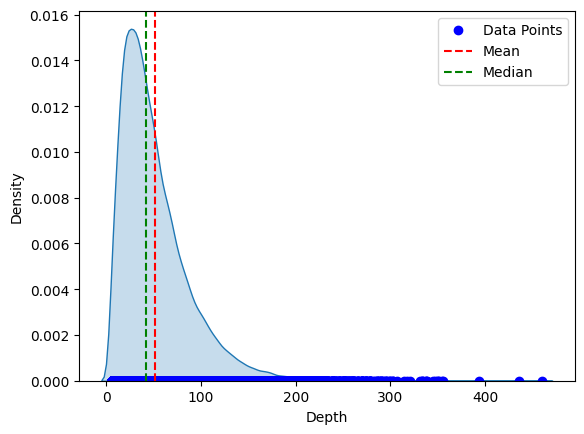

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm

start = NodeGame("0", "XOOO---XXX", [], "0")
node_dict = {"0" : start}

WIN_CONDITION = generating_win_condition(data_all_state)
list_all_game_moves = []

def plotting_graph_kde(datas):
  data = datas

  # Create KDE plot using seaborn
  sns.kdeplot(data, fill=True)

  # Plot individual data points as points
  plt.plot(data, [0] * len(data), 'bo', label='Data Points')

  # Calculate mean and median
  mean = sum(data) / len(data)
  median = sorted(data)[len(data) // 2]

  # Display mean and median as vertical lines
  plt.axvline(mean, color='r', linestyle='--', label='Mean')
  plt.axvline(median, color='g', linestyle='--', label='Median')

  # Set plot labels and legend
  plt.xlabel('Depth')
  plt.ylabel('Density')
  plt.legend()

  # Display the plot
  plt.show()

def count_occurence(datas):
  data = datas

  # Count occurrences using Counter
  counts = Counter(data)
  dict_info = {}

  # Print the counts
  for element, count in counts.items():
      dict_info[element] = count

  return dict_info

def play_game():
  start = NodeGame(None, "XOOO---XXX", [], None)
  game_moves = [start]
  list_len_possible_moves = []
  counter = 0

  present_game = start

  while True:
    all_possible_move = present_game.all_possible_move
    max_possible_moves = len(all_possible_move)
    list_len_possible_moves.append(max_possible_moves)


    if (present_game.string_state in WIN_CONDITION):
      who_won = game_moves[-2].string_state[0]

      list_all_game_moves.append({"game_moves" : game_moves, "len_game": len(game_moves), "who_won": who_won, "list_len_possible_moves": list_len_possible_moves})
      #print(f"{who_won} wins! len moves = {len(game_moves)}")
      return {"game_moves" : game_moves, "len_game": len(game_moves), "who_won": who_won, "list_len_possible_moves": list_len_possible_moves}

    if max_possible_moves == 0:
      list_all_game_moves.append({"game_moves" : game_moves, "len_game": len(game_moves), "who_won": "Draw", "list_len_possible_moves": list_len_possible_moves})
      #print(f"Draw  ! len moves = {len(game_moves)}")
      return {"game_moves" : game_moves, "len_game": len(game_moves), "who_won": "Draw", "list_len_possible_moves": list_len_possible_moves}

    pick_random_index_move = random.randint(0,len(all_possible_move)-1)
    pick_random_move = all_possible_move[pick_random_index_move]

    next_move =  NodeGame(None, pick_random_move, game_moves, None)

    counter = counter + 1
    present_game = next_move
    game_moves.append(present_game)

len_experiment = 100000
for i in tqdm(range(len_experiment)):
  play_game()

all_list_depth = []
all_list_winning = []
all_list_len_possible_moves = []

for i in list_all_game_moves:
  all_list_depth.append(i["len_game"])
  all_list_winning.append(i["who_won"])
  all_list_len_possible_moves.append(sum(i["list_len_possible_moves"])/len(i["list_len_possible_moves"]))

def game_statistic(num = len(all_list_depth)):
  list_depth = all_list_depth[:num]
  list_winning = all_list_winning[:num]

  average_depth = sum(list_depth)/len(list_depth)
  max_depth = max(list_depth)
  min_depth = min(list_depth)
  average_possible_moves = sum(all_list_len_possible_moves)/len(all_list_len_possible_moves)

  print(f"average depth: {average_depth}")
  print(f"max depth: {max_depth}")
  print(f"min depth: {min_depth}")
  print(f"average possible moves: {average_possible_moves}")

  print()
  print("game_win_statistic: ")
  win_statistic = count_occurence(list_winning)
  print(win_statistic)
  print(f"X Win/Lose/Draw Percentage: {(win_statistic['X']*100)/len_experiment}% / {(win_statistic['O']*100)/len_experiment}% / {(win_statistic['Draw']*100)/len_experiment}%")
  print(f"O Win/Lose/Draw Percentage: {(win_statistic['O']*100)/len_experiment}% / {(win_statistic['X']*100)/len_experiment}% / {(win_statistic['Draw']*100)/len_experiment}%")
  plotting_graph_kde(list_depth)

game_statistic()